<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project <br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

In this project, the dataset will be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

A model will be built as a classifier with images to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread # library to convert images to array and then to display via imshow

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True) # to avoid scientific number display

In [1]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [6]:
my_data_dir = "data"

In [10]:
os.listdir(my_data_dir)

['validation', 'test', 'train']

In [11]:
# assignt pathes to val, test and train subdirectories to variables
val_path = os.path.join(my_data_dir, "validation")
train_path = os.path.join(my_data_dir, "train")
test_path = os.path.join(my_data_dir, "test")
# val and train data will be used for modelling and then test data will be used to get predictions in the end

In [ ]:
# for ex
train_path

In [12]:
# check the subfolders under train-path
os.listdir(train_path)

['dog', 'cat']

In [13]:
# check the subfolders under val-path; both are the same
os.listdir(val_path)
# binary data

['dog', 'cat']

In [14]:
# not separated as cat or dog; named with img numbers
os.listdir(test_path)[:5]

['5201.jpg', '12111.jpg', '6224.jpg', '11914.jpg', '5588.jpg']

In [15]:
# Alternative method to check the subdirectories and see the classes
import pathlib

data_dir = pathlib.Path(train_path)  # this turns training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # *: retrieve all; search can be limited with regex
# created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


**Let's check how many images there are.**

In [16]:
# check the number of images for each class in train data
len(os.listdir(os.path.join(train_path, "cat"))), len(
    os.listdir(os.path.join(train_path, "dog"))
)
# There can be an imbalanced situation between classes; chec scores if the data is imbalanced and use class_weight if it's

(12500, 5026)

In [17]:
# check the number of images for each class in val data
len(os.listdir(os.path.join(val_path, "cat"))), len(
    os.listdir(os.path.join(val_path, "dog"))
)

(1219, 1071)

In [18]:
# a better way: use os.walk to check all directories and the files inside them
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir): # my_data_dir: path of data
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
    )

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 6897 images in 'data/test'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 0 directories and 12500 images in 'data/train/cat'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [19]:
os.listdir(os.path.join(train_path, "cat"))[0]

'cat.5980.jpg'

In [20]:
os.listdir(os.path.join(train_path, "dog"))[0]

'2462.jpg'

In [21]:
path1 = os.path.join(train_path, "cat", os.listdir(os.path.join(train_path, "cat"))[0])
path2 = os.path.join(train_path, "dog", os.listdir(os.path.join(train_path, "dog"))[0])

In [22]:
# convert them into array via imread() to use with imshow
cat_img = imread(path1)
dog_img = imread(path2)

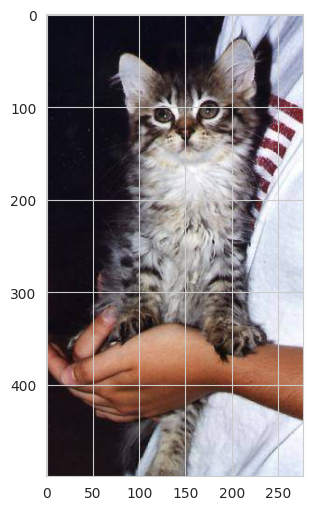

In [23]:
plt.imshow(cat_img)
plt.show()

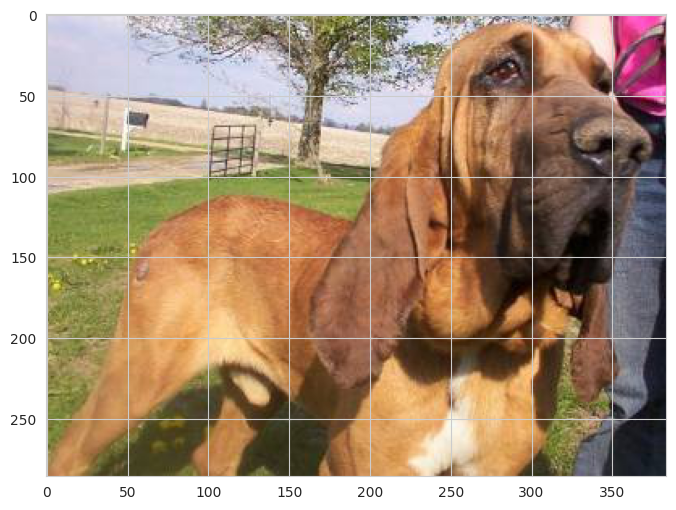

In [24]:
plt.imshow(dog_img)
plt.show()

In [25]:
# View an image trough a user-defined function
import random


def view_random_image(target_dir, target_class):
    """Display and return an image given the target_dir and target_class.
    Args:
        target_dir (str): The full or relative path of the directory of the target.
        target_class (str): The name of the target_class you want to display and return.
    Returns:
        img: (np.ndarray): Image as numpy array.
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (300, 399, 3)


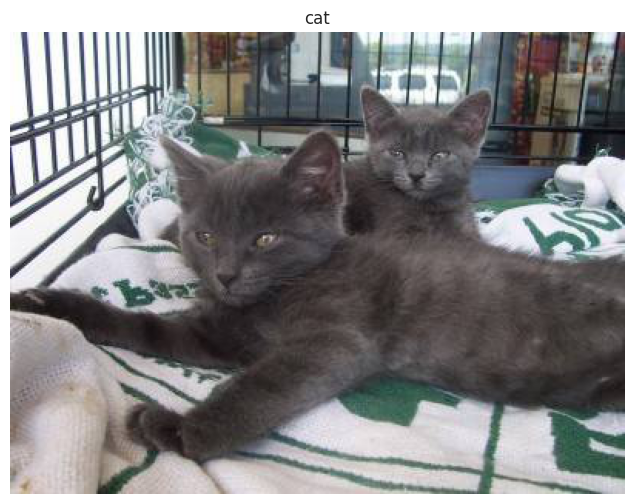

In [26]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="cat")

Image shape: (375, 499, 3)


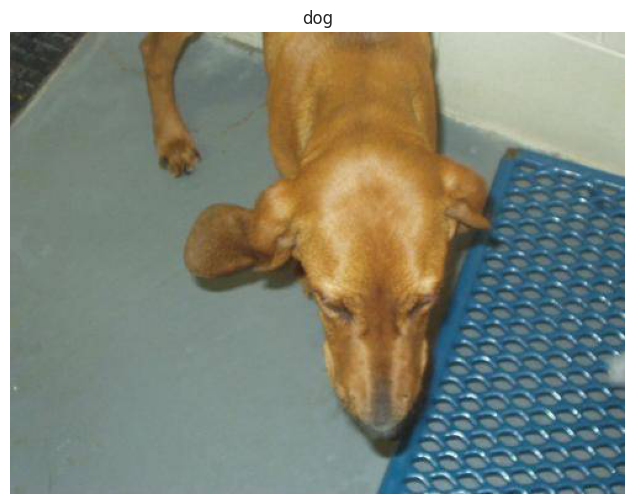

In [27]:
# View a random image from the training dataset
img = view_random_image(target_dir=val_path, target_class="dog")

Image shape: (373, 500, 3)


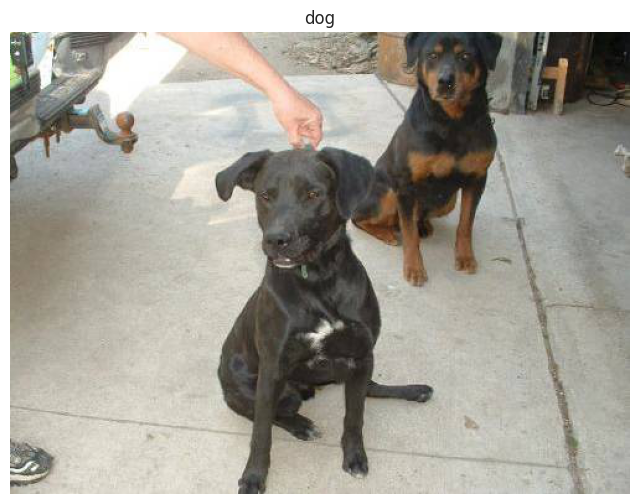

In [28]:
# View a random image from the training dataset

img = view_random_image(target_dir=train_path, target_class=random.choice(class_names))
# get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [29]:
cat_img.shape

(499, 277, 3)

In [30]:
dog_img.shape

(286, 384, 3)

```python
x = []
y = []
for image in os.listdir(os.path.join(train_path, 'cat')):

    img = imread(os.path.join(train_path, 'cat', image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)
```

In [31]:
# get the images vial list comprehension
x = [
    imread(os.path.join(train_path, "cat", image)).shape[0]
    for image in os.listdir(os.path.join(train_path, "cat"))
]
y = [
    imread(os.path.join(train_path, "cat", image)).shape[1]
    for image in os.listdir(os.path.join(train_path, "cat"))
]

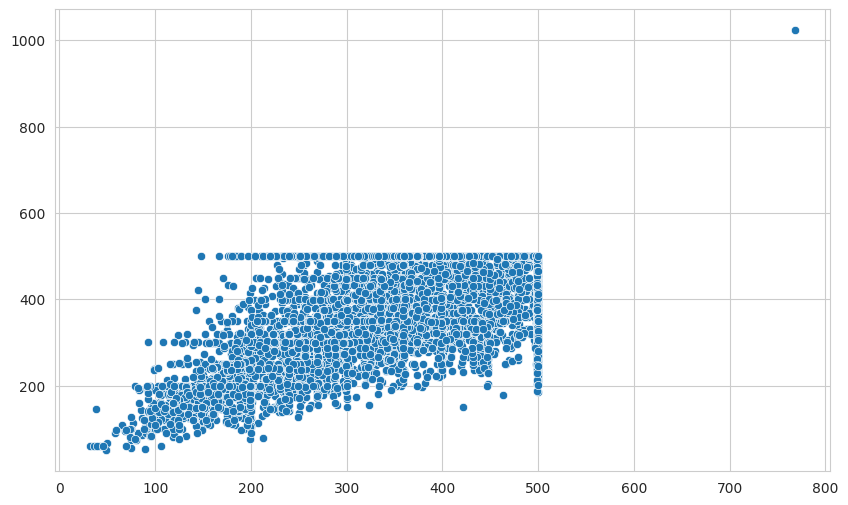

In [32]:
sns.scatterplot(x=x, y=y)
plt.show()

In [33]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [34]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [35]:
# to avoid the overfitting risk, use a smaller size for all images.
image_shape = (128, 128, 3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [36]:
cat_img.max()

255

In [37]:
cat_img.min()

0

In [38]:
dog_img.max(), dog_img.min()

(255, 0)

As we see above, images need to be scaled

## Image Data Generator

**Image Manipulation**

IDG generates batches of tensor image data with real-time data augmentation. We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If the model is overfiting (e.g. the validation loss keeps increasing), data augmentation can be tried to imrpove the performance of the model

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-24 13:21:34.595176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# help(ImageDataGenerator)

In [41]:
image_gen = ImageDataGenerator(
    rotation_range=15,  # rotate the image up to 15 degrees
    width_shift_range=0.10,  # Shift the pic width by a max of 10%
    height_shift_range=0.10,  # Shift the pic height by a max of 10%
    rescale=1 / 255,  # Rescale the image by normalzing it.
    shear_range=0.1,  # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1,  # Zoom in/out by 10% max
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode="nearest",  # Fill in missing pixels with the nearest filled value
)

# IDG yukardakilerin tamamini her image icin yapmaz. Bazi imagelari sadece rotate veya height shift, diger bazilarini sadece 
# zoom ve flip yapabilir... cesitlendirme ile boylece modelin daha iyi genelleme yapabilmesini ve gormedigi imagelara
# daha sonra daha iyi cevap verebilmesini sağlar. Ama burada kesin bir transformation yok; burada modele girecek sekilde 
# parametreler hazirlaniyor. modele batchler halinde alacak ve her batche ayrğ ayri yukarda belirlenen
# parametre araligina gore transformasyon yapilacak.

In [42]:
# only sclae for val data
val_image_gen = ImageDataGenerator(rescale=1 / 255)

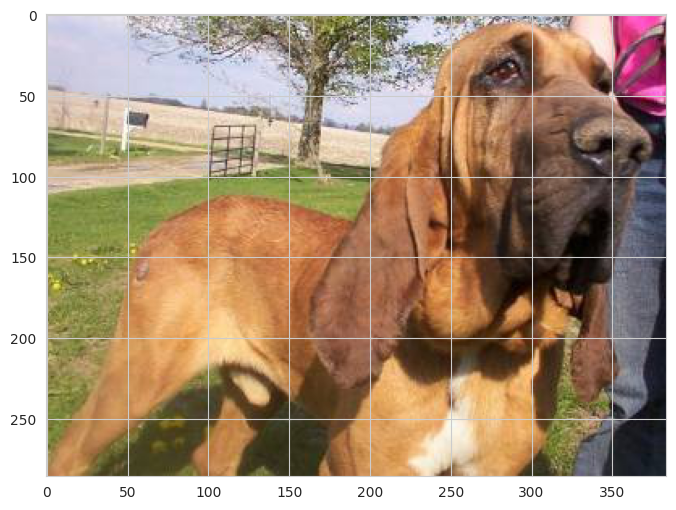

In [43]:
plt.imshow(dog_img)
plt.show()

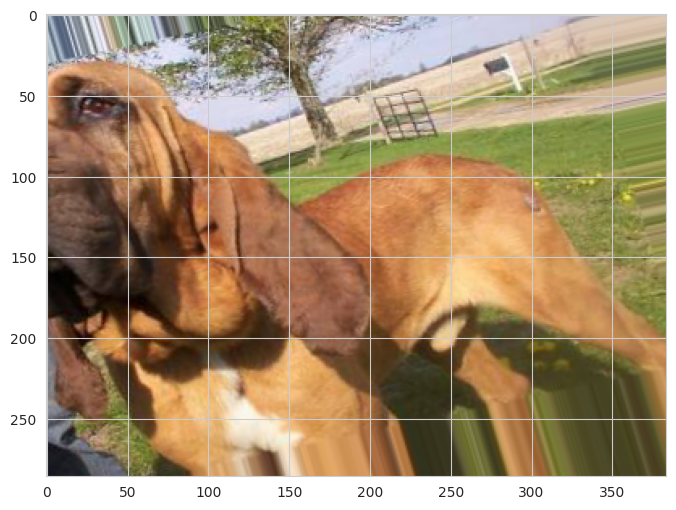

In [44]:
plt.imshow(image_gen.random_transform(dog_img))
plt.show()

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [45]:
# help(image_gen.flow_from_directory)
# Takes the path to a directory & generates batches of augmented data.

In [46]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [47]:
val_image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [48]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [49]:
batch_size = 32

In [50]:
image_shape

(128, 128, 3)

In [51]:
train_image_gen = image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
)

Found 17526 images belonging to 2 classes.


In [52]:
val_image_gen = val_image_gen.flow_from_directory(
    directory=val_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
)

Found 2290 images belonging to 2 classes.


In [53]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [54]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [55]:
train_image_gen[0][0].shape

(32, 128, 128, 3)

In [56]:
len(train_image_gen), len(val_image_gen)

(548, 72)

In [57]:
len(train_image_gen) * batch_size, len(val_image_gen) * batch_size

(17536, 2304)

In [58]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
images.shape, labels.shape

((32, 128, 128, 3), (32,))

In [59]:
# Get a sample of the testing data batch
images, labels = val_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    Conv2D,
    MaxPooling2D,
    BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
model1 = Sequential()

model1.add(
    Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation("relu"))

model1.add(Dense(64))
model1.add(Activation("relu"))

model1.add(Dense(1))
model1.add(Activation("sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [63]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",patience=4, restore_best_weights=True)

In [64]:
model1.fit(
    train_image_gen,
    epochs=10,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
)

Epoch 1/10
548/548 [==============================] - 154s 258ms/step - loss: 0.5690 - accuracy: 0.7224 - val_loss: 0.6426 - val_accuracy: 0.6380
Epoch 2/10
548/548 [==============================] - 141s 258ms/step - loss: 0.4885 - accuracy: 0.7683 - val_loss: 0.4926 - val_accuracy: 0.7690
Epoch 3/10
548/548 [==============================] - 138s 252ms/step - loss: 0.4383 - accuracy: 0.8030 - val_loss: 0.5002 - val_accuracy: 0.7677
Epoch 4/10
548/548 [==============================] - 140s 254ms/step - loss: 0.4128 - accuracy: 0.8138 - val_loss: 0.4665 - val_accuracy: 0.7934
Epoch 5/10
548/548 [==============================] - 140s 255ms/step - loss: 0.3819 - accuracy: 0.8286 - val_loss: 0.4211 - val_accuracy: 0.8070
Epoch 6/10
548/548 [==============================] - 137s 251ms/step - loss: 0.3604 - accuracy: 0.8403 - val_loss: 0.4753 - val_accuracy: 0.7681
Epoch 7/10
548/548 [==============================] - 155s 283ms/step - loss: 0.3396 - accuracy: 0.8502 - val_loss: 0.4064 -

In [65]:
summary = pd.DataFrame(model1.history.history)

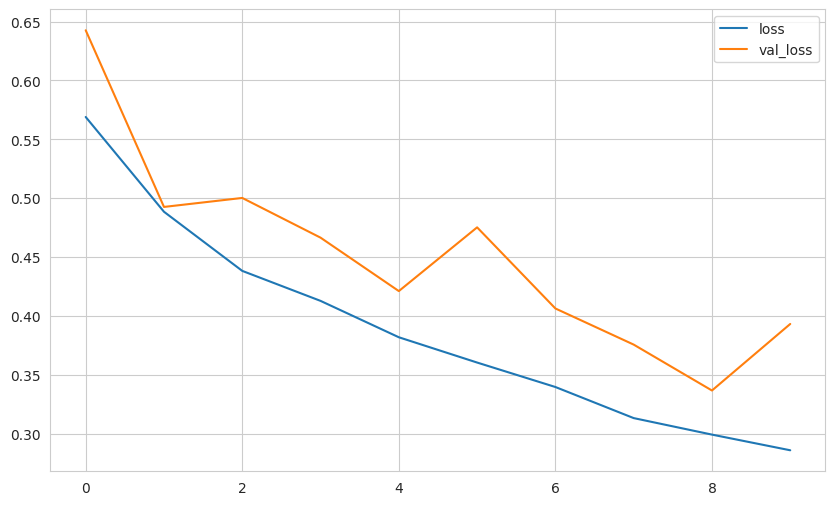

In [66]:
summary[["loss", "val_loss"]].plot()
plt.show()

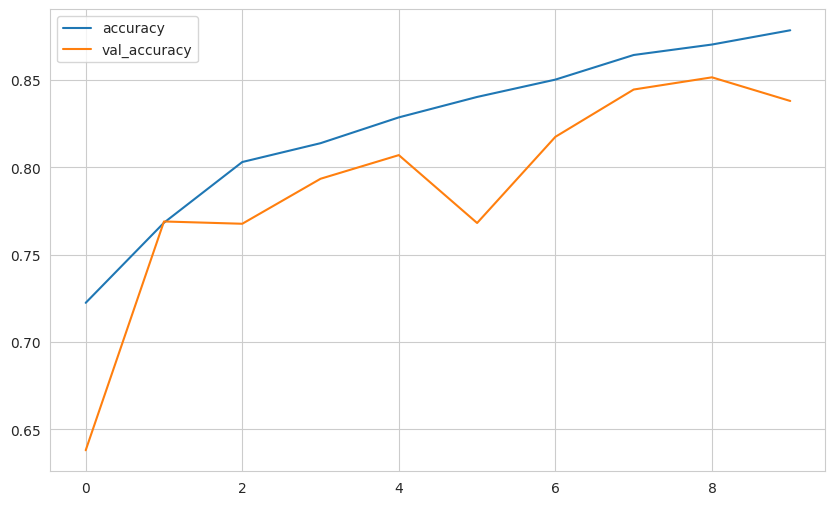

In [67]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
score = model1.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

72/72 [==============================] - 7s 96ms/step - loss: 0.3932 - accuracy: 0.8380
Test loss: 0.3932010531425476
Test accuracy: 0.8379912376403809


In [70]:
pred_prob = model1.predict(val_image_gen)
pred_prob

72/72 [==============================] - 8s 113ms/step


array([[0.00083242],
       [0.11985112],
       [0.03267261],
       ...,
       [0.8080377 ],
       [0.96594995],
       [0.96795624]], dtype=float32)

In [ ]:
y_pred = pred_prob > 0.5
y_pred

In [ ]:
y_test = val_image_gen.classes

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1219
           1       0.92      0.71      0.80      1071

    accuracy                           0.84      2290
   macro avg       0.86      0.83      0.83      2290
weighted avg       0.85      0.84      0.83      2290



In [74]:
confusion_matrix(y_test, y_pred)

array([[1157,   62],
       [ 309,  762]])

# Modelling-2

In [75]:
# a more complex model with batch normalization and more conv layers
model2 = Sequential()

model2.add(
    Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation("relu"))

model2.add(Dense(128))
model2.add(Activation("relu"))

model2.add(Dense(1))
model2.add(Activation("sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)       128       
 hNormalization)                                                 
                                                      

In [77]:
early_stop = EarlyStopping(monitor="val_loss",mode="min", patience=4, restore_best_weights=True)

In [ ]:
model2.fit(
    train_image_gen,
    epochs=15,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
)

Epoch 1/15
548/548 [==============================] - 141s 249ms/step - loss: 0.5343 - accuracy: 0.7457 - val_loss: 0.8699 - val_accuracy: 0.6441
Epoch 2/15
548/548 [==============================] - 134s 245ms/step - loss: 0.4430 - accuracy: 0.7962 - val_loss: 0.5409 - val_accuracy: 0.7297
Epoch 3/15
158/548 [=======>......................] - ETA: 1:32 - loss: 0.4015 - accuracy: 0.8165

In [ ]:
summary = pd.DataFrame(model2.history.history)

In [ ]:
summary[["loss", "val_loss"]].plot()
plt.show()

In [ ]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [ ]:
score = model2.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
pred_prob = model2.predict(val_image_gen)
pred_prob

In [ ]:
y_pred = pred_prob > 0.5
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

# Modelling-3

In [ ]:
model3 = Sequential()

model3.add(
    Conv2D(
        filters=16,
        kernel_size=(3, 3),
        padding="same",
        input_shape=image_shape,
        activation="relu",
    )
)
model3.add(BatchNormalization())
model3.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation("relu"))

model3.add(Dense(128))
model3.add(Activation("relu"))

model3.add(Dense(1))
model3.add(Activation("sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model3.summary()

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",mode="min", patience=4, restore_best_weights=True)

In [ ]:
model3.fit(
    train_image_gen,
    epochs=20,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
)

In [ ]:
# model3.save('cat_dog_detector.h5')

In [ ]:
summary = pd.DataFrame(model3.history.history)

In [ ]:
summary[["loss", "val_loss"]].plot()
plt.show()

In [ ]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Validation Data

In [ ]:
score = model3.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
pred_prob = model3.predict(val_image_gen)
pred_prob

In [ ]:
y_pred = pred_prob > 0.5
y_pred

In [ ]:
y_test = val_image_gen.classes

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
model3.save("cat_dog_detector.h5")

# Prediction-1

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model("cat_dog_detector.h5")

In [ ]:
img_path = "./data/test/10071.jpg"

In [ ]:
img = image.load_img(img_path)
img

In [ ]:
img = np.array(img)

In [ ]:
img.shape

In [ ]:
resized_img = image.smart_resize(img, (128, 128))  # img has to be numpy array
resized_img.shape

# resized_img = img.resize((128, 128)) # img has to be image format (like jpg, png etc)
# resized_img

In [ ]:
resized_img.max()

In [ ]:
resized_img = resized_img / 255

In [ ]:
plt.imshow(resized_img)
plt.show()

In [ ]:
resized_img = np.expand_dims(resized_img, axis=0)
resized_img.shape

In [ ]:
model.predict(resized_img)

In [ ]:
val_image_gen.class_indices

# Prediction-2

In [ ]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

In [ ]:
image_path = os.path.join(test_path, random_image[0])
image_path

In [ ]:
my_image = image.load_img(image_path, target_size=image_shape)

In [ ]:
my_image

In [ ]:
type(my_image)

In [ ]:
# my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [ ]:
my_image.max()

In [ ]:
my_image = my_image / 255

In [ ]:
my_image.shape

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

In [ ]:
model.predict(my_image)

In [ ]:
train_image_gen.class_indices

In [ ]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    random_image = random.sample(os.listdir(test_path), 1)
    img_path = os.path.join(test_path, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)
    if img.max() > 1:
        img = img / 255

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]
        # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]
        # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

In [ ]:
pred_and_plot(model, image_shape[:2])